In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/hoangnamtran/anaconda3/envs/jupyterlab/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [15]:
import tensorflow as tf
print(tf.__version__)

2.19.0


2.16.2


In [17]:
from tensorflow.keras.models import load_model
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [26]:
new_model = load_model(os.path.join('models','material_science_13.h5'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Image: 7i_33 percent stretched-HR.jpg
Predicted class: Material Science Picture
Confidence: 100.00%


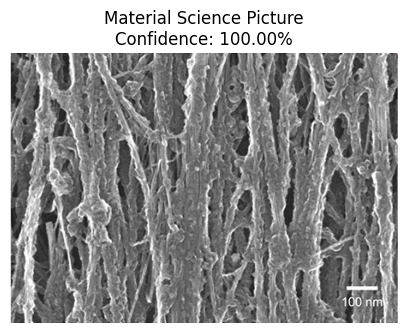

--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Image: _0_1238.jpg
Predicted class: Material Science Picture
Confidence: 100.00%


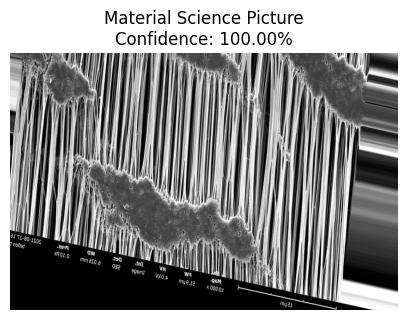

--------------------------------------------------


In [30]:
test_case = 'test_case'
for img_path in os.listdir(test_case):
    img = cv2.imread(os.path.join(test_case, img_path)) 
    if img is None:
        print(f'Warning: Unable to running file {img}')
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    resize = cv2.resize(img, (256, 256))  
    # Normalize (if the model expects input values between 0 and 1)
    resize = resize / 255.0  
    
    # Add batch dimension (expand dims)
    yhatnew = new_model.predict(np.expand_dims(resize, axis=0)).squeeze() 
    predicted_class = "Material Science Picture" if yhatnew > 0.5 else "Not a Material Science Picture"
    confidence = yhatnew * 100 if yhatnew > 0.5 else (1 - yhatnew) * 100

    # Print prediction results
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")

    # Display the image with prediction results
    plt.figure(figsize=(5, 5))
    plt.imshow(img)  # Image is already in RGB format
    plt.title(f"{predicted_class}\nConfidence: {confidence:.2f}%", fontsize=12)
    plt.axis("off")  # Hide axes
    plt.show()  # Show the image
    print("-"*50)
